In [1]:
import torch
from helpers.feature_extraction import feature_vector
import cv2 as cv
import numpy as np
import neat
import os
import gym
import gym_snake
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import torch
import random
from tqdm import tqdm


In [2]:
# Construct Environment
env = gym.make('snake-v0')
env.grid_size = 15, 15
observation = env.reset()  # Constructs an instance of the game

# Controller
game_controller = env.controller

# Grid
grid_object = game_controller.grid
grid_pixels = grid_object.grid

# Snake(s)
snakes_array = game_controller.snakes
snake_object1 = snakes_array[0]

observation = env.reset()
to_pixels = lambda x: cv.resize(x, env.grid_size)

In [3]:
def eval_genomes(individuals, config):
    global env
    nets = []
    ge = []
    for genome_id, genome in individuals:
        genome.fitness = 0  # start with fitness level of 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        nets.append(net)
        ge.append(genome)
    to_pixels = lambda x: cv.resize(x, env.grid_size)
    x = 0
    for net in tqdm(nets):
        observation = env.reset()  # Constructs an instance of the game
        # Controller
        game_controller = env.controller
        # Grid
        grid_object = game_controller.grid
        grid_pixels = grid_object.grid
        # Snake(s)
        snakes_array = game_controller.snakes
        snake_object1 = snakes_array[0]
        fitness = 0
        features = feature_vector(snake_object1, grid_object.grid, env.grid_size, grid_object.FOOD_COLOR)
        output = nets[x].activate(features)
        action = np.argmax(output).item()
        actions = [action]
        observation, reward, done, info = env.step(action)
        fitness += reward
        while not done:
            env.render()
            features = feature_vector(snake_object1, observation, env.grid_size, grid_object.FOOD_COLOR)
            output = nets[x].activate(features)
            action = np.argmax(output).item()
            observation, reward, done, info = env.step(action)
            actions.append(action)
            fitness += reward
        ge[x].fitness = fitness
        x += 1  

In [4]:
def run(config_file):
    """
    runs the NEAT algorithm to train a neural network to play flappy bird.
    :param config_file: location of config file
    :return: None
    """
    config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                                neat.DefaultSpeciesSet, neat.DefaultStagnation,
                                config_file)

    # Create the population, which is the top-lDefaultGenomeevel object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    # p.add_reporter(neat.Checkpointer(5))

    # Run for up to 50 generations.
    winner = p.run(eval_genomes, 50)

    # show final stats
    print('\nBest genome:\n{!s}'.format(winner))

	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_conn

  0%|          | 0/50 [00:00<?, ?it/s]/home/arattel/PycharmProject/Gym-Snake/gym_snake/envs/snake_env.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()



 ****** Running generation 0 ****** 



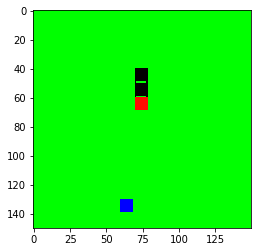

100%|██████████| 50/50 [01:32<00:00,  1.85s/it]


Population's average fitness: -0.94000 stdev: 0.23749
Best fitness: 0.00000 - size: (8, 60) - species 36 - id 36
Average adjusted fitness: 0.060


  0%|          | 0/153 [00:00<?, ?it/s]

Mean genetic distance 3.157, standard deviation 0.425
Population of 153 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     3     -1.0    0.000     0
     2    0     3     -1.0    0.000     0
     3    0     3     -1.0    0.000     0
     4    0     3     -1.0    0.000     0
     5    0     3     -1.0    0.000     0
     6    0     3     -1.0    0.000     0
     7    0     3     -1.0    0.000     0
     8    0     3     -1.0    0.000     0
     9    0     3     -1.0    0.000     0
    10    0     3     -1.0    0.000     0
    11    0     3     -1.0    0.000     0
    12    0     3     -1.0    0.000     0
    13    0     3     -1.0    0.000     0
    14    0     3     -1.0    0.000     0
    15    0     3     -1.0    0.000     0
    16    0     3     -1.0    0.000     0
    17    0     3     -1.0    0.000     0
    18    0     3     -1.0    0.000     0
    19    0     3     -1.0    0.000     0
    20    0     3     -

100%|██████████| 153/153 [04:48<00:00,  1.89s/it]


Population's average fitness: -0.94771 stdev: 0.25025
Best fitness: 1.00000 - size: (8, 60) - species 22 - id 22
Average adjusted fitness: 0.027
Mean genetic distance 3.155, standard deviation 0.426
Population of 150 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1     3     -1.0    0.000     1
     2    1     3     -1.0    0.000     1
     3    1     3      0.0    0.167     0
     4    1     3      0.0    0.167     0
     5    1     3     -1.0    0.000     1
     6    1     3     -1.0    0.000     1
     7    1     3     -1.0    0.000     1
     8    1     3      0.0    0.167     0
     9    1     3     -1.0    0.000     1
    10    1     3     -1.0    0.000     1

  0%|          | 0/150 [00:00<?, ?it/s]


    11    1     3     -1.0    0.000     1
    12    1     3     -1.0    0.000     1
    13    1     3     -1.0    0.000     1
    14    1     3     -1.0    0.000     1
    15    1     3     -1.0    0.000     1
    16    1     3     -1.0    0.000     1
    17    1     3     -1.0    0.000     1
    18    1     3     -1.0    0.000     1
    19    1     3     -1.0    0.000     1
    20    1     3     -1.0    0.000     1
    21    1     3     -1.0    0.000     1
    22    1     3      1.0    0.333     0
    23    1     3     -1.0    0.000     1
    24    1     3     -1.0    0.000     1
    25    1     3     -1.0    0.000     1
    26    1     3     -1.0    0.000     1
    27    1     3     -1.0    0.000     1
    28    1     3     -1.0    0.000     1
    29    1     3     -1.0    0.000     1
    30    1     3      0.0    0.167     0
    31    1     3     -1.0    0.000     1
    32    1     3     -1.0    0.000     1
    33    1     3     -1.0    0.000     1
    34    1     3     -1.0    0.0

 83%|████████▎ | 125/150 [03:55<00:47,  1.90s/it]/home/arattel/snake-game/helpers/feature_extraction.py:13: RuntimeWarning: invalid value encountered in true_divide
  res = vector / np.linalg.norm(vector)
 92%|█████████▏| 138/150 [04:21<00:22,  1.86s/it]

KeyboardInterrupt: 

In [5]:
if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = os.path.abspath('')
    config_path = os.path.join(local_dir, 'config-feedforward.txt')
    run(config_path)
